# GENIA Data IDF vs. ICF Plot

Authors: Samuel Sarria Hurtado and Paul Sheridan

Last update: 2023-10-02

Description: Plot IDF vs. ICF for the preprocessed GENIA Term corpus data overlain with expected curves under the multinomial language model. 

Inputs:
* Preprocessed documents (JSON): GENIAcorpus3.02-preprocessed.json

Outputs:
* Figure 1 from the paper (PDF): figure-1.pdf

## Imports

In [1]:
import math
import numpy as np
import json
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import sys
sys.path.append('../0-base-functions/')
from wordstats import *

## Read and Prepare GENIA Data

In [2]:
# Set paths
data_path = '../0-data-preprocessed/'
json_file_path = data_path + 'GENIAcorpus3.02-preprocessed.json'

# Read the data
with open(json_file_path, "r") as j:
  genia = json.loads(j.read())

In [3]:
# Prepare the data for analysis
counter = CountVectorizer()
vect_col = counter.fit_transform(genia)
vocab = counter.get_feature_names_out()

## Calculate IDF and ICF Values

In [4]:
m = len(vocab)
d = vect_col.shape[0]
N_i = get_Ni(vect_col)
N_j = get_Nj(vect_col)
N = get_N(N_i)
B_ij = get_Bij(vect_col)
B_i = get_Bi(B_ij)
CF = get_cf(N_i)
DF = get_df(B_i, d)
IDF = get_idf(DF)
ICF = get_icf(CF)

## Calculate Expected Curves

In [5]:
theta = get_thetas(CF, 1/1000)
E_ICF = get_eicf(theta, N)
uBi = get_mean_Bi(theta, N_j, d)
bernoulli = get_matrix_bernoulli(theta, d)
variance_Bi = get_variance_Bi(N_j, bernoulli)
E_IDF = get_eidf(uBi, varianceBi, d)
mean_Nj = N_j.mean()
constant = np.log(mean_Nj) + (-2 + mean_Nj)/(4*N*mean_Nj)
line = E_IDF + constant

## Generate Plot

In [6]:
# Points for plotting
X = IDF.A[0]
Y = ICF.A[0]

# Deduplicate points
points = list(zip(X, Y))
no_rep_points = list(set(points))
x_and_y = np.array(list(zip(*no_rep_points)))
x = x_and_y[0]
y = x_and_y[1]

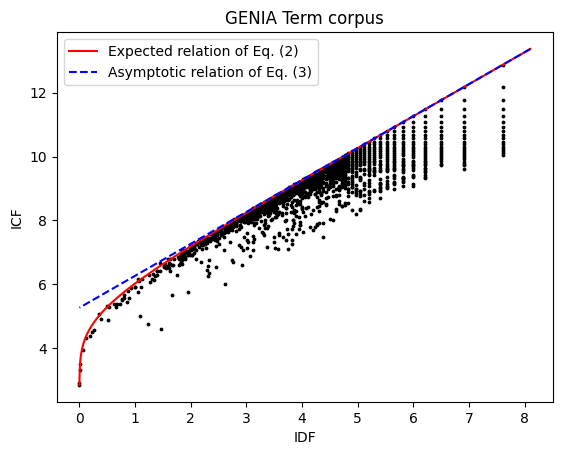

In [7]:
# Create figure
fig, ax = plt.subplots()
ax.scatter(x, y, s = 3, c = 'k')
ax.plot(E_IDF, E_ICF, 'r', label = 'Expected relation of Eq. (2)')
ax.plot(E_IDF, line, 'b--', label='Asymptotic relation of Eq. (3)')
ax.set_title('GENIA Term corpus')
ax.set_xlabel('IDF')
ax.set_ylabel('ICF')
ax.legend()
# The line below writes the file in the same folder as this notebook, uncomment to rewrite.
#fig.savefig('figure-1.pdf')